# Gold Recovery Process: Evaluation and Predictions

## **Introduction:**

Zyfra is looking to create a predictive model that will help a gold mining and refinement company develop more efficient processes. I will explore the provided data in the three data sets to make sure that it is all usable for the machine learning process. Then I will make any changes necessary. When the data is fully ready, I will use three different regression models to find more optimized solutions for the gold mining company. 


### Load the libaries and data. Then get a preliminary look at the data.

In [1]:
#Import libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
#create dataframes from the csv files
df_train = pd.read_csv('gold_recovery_train.csv')
df_test = pd.read_csv('gold_recovery_test.csv')
df_full = pd.read_csv('gold_recovery_full.csv')

In [3]:
#look at the first 5 rows of the train set
display(df_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
#Are there any repeat dates in this dataset?
print(df_train['date'].nunique())

16860


In [5]:
# what percentage of the training set is null values?
percentage_null_train = (df_train.isnull().sum().sum() / df_train.size) * 100

print(f"Percentage of null values in the training set: {percentage_null_train:.2f}%")

Percentage of null values in the training set: 2.07%


In [6]:
#look at the first 5 rows of the test set
display(df_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
# Are all the date values unique, or are there multiple observations at the same time?
print(df_test['date'].nunique())

5856


In [8]:
#What percentage of the test data is null?
percentage_null_test = (df_test.isnull().sum().sum() / df_test.size) * 100

print(f"Percentage of null values in the test set: {percentage_null_test:.2f}%")

Percentage of null values in the test set: 0.76%


In [9]:
#look at the first 5 rows of the full set
display(df_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
# Are all the date values in this set also unique?
print(df_full['date'].nunique())

22716


In [11]:
# How much of the data is null?
percentage_null_full = (df_full.isnull().sum().sum() / df_full.size) * 100

print(f"Percentage of null values in the full set: {percentage_null_full:.2f}%")

Percentage of null values in the full set: 1.85%


In [12]:
#get a closer look at the data frames by calling info() on each of them
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### All of the data above is correctly loaded. I've found that since the date column is fully unique values, that can function as an observational ID for later processing. I've also seen that there is quite a lot of null values that will have to be addressed before the machine learning models can be developed.

### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

#### This is the formula I will be using to caluclate recovery

Recovery = ((C*(F-T))/(F*(C-T)))*100

C = Concentrate after flotation (Concentrate): rougher.output.concentrate_au

F = Gold in Feed before flotation (Feed): rougher.input.feed_au

T = Gold in Rougher Tails after flotation (Tails): rougher.output.tail_au

In [15]:
#Make a new DataFrame with the columns needed for the recovery calclation
recovery_check_df = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]

#Rename the columns to make it easier to write the equation
recovery_check_df = recovery_check_df.rename(columns={
    'rougher.output.concentrate_au': 'C',
    'rougher.input.feed_au': 'F',
    'rougher.output.tail_au': 'T'
})

#Verify that the DataFrame was made correctly
display(recovery_check_df.head())

#Call info to check on null values and data types to see if anything needs to be resolved before calculations
recovery_check_df.info()

,C,F,T,rougher.output.recovery
0,19.793808,6.486150,1.170244,87.107763
1,20.050975,6.478583,1.184827,86.843261
2,19.737170,6.362222,1.162562,86.842308
3,19.320810,6.118189,1.079755,87.226430
4,19.216101,5.663707,1.012642,86.688794


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   C                        16778 non-null  float64
 1   F                        16777 non-null  float64
 2   T                        14611 non-null  float64
 3   rougher.output.recovery  14287 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


In [16]:
#drop null values
recovery_check_df = recovery_check_df.dropna()

In [17]:
#Perform the recovery calculation and add it as a new column
recovery_check_df['recovery_calculated'] = ((recovery_check_df['C']*(recovery_check_df['F'] - recovery_check_df['T']))/(recovery_check_df['F']*(recovery_check_df['C']-recovery_check_df['T'])))*100

#Verify the new column is in place
display(recovery_check_df.head())
print(recovery_check_df.shape)

,C,F,T,rougher.output.recovery,recovery_calculated
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


(14287, 5)


In [18]:
#Calculate the Mean Absolute Error
mae = mean_absolute_error(recovery_check_df['rougher.output.recovery'], recovery_check_df['recovery_calculated'])
print('MAE:', mae)

MAE: 9.303415616264301e-15


#### The mean absolute error is essentially 0 which suggests that the "rougher.output.recovery" column was calculated correctly.

### Analyze the features not available in the test set. What are these parameters? What is their type?

#### What is different between the features in the Test set and the Train set?

In [19]:
#make a list of test columns
test_list = df_test.columns.tolist()
#remove those columns from the training set and assign that to a new dataframe
train_notin_test = df_train.drop(test_list, axis=1)
#show the new dataframe
display(train_notin_test.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


In [20]:
#call info() on the not in test dataframe
train_notin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


#### Training and Testing set feature assessment

There are 34 columns not present in the Test set that are in the Training set. The training set has: "final" features(9 columns); and "output" parameters in the "primary"(8 columns), "secondary" (4 columns), and "rougher" (9 columns) features; and "rougher.calculations" (4 columns). This is 34 less columns in total.

All features that are not in the test set are of the float datatype.

### Merge data to get the Test set to have the same features as the Train set

Now I will need to extract the data from the full data set of these columns and make a new DataFrame to merge with the test set. I will also need to add the 'date' column to use that as the merging column. As demonstrated above, all the recorded dates are unique, so they will function as the 'id' on which ot merge.

In [21]:
# Make a list of the missing columns
absent_list = train_notin_test.columns.tolist()

In [22]:
# Retrieve those columns from the full dataset and merge on the date
df_absent_list = df_full[absent_list]
# Add in the 'date' column
df_absent_list['date'] = df_full['date']
# Move 'date' column to the first position
columns = ['date'] + [col for col in df_absent_list.columns if col != 'date']
df_absent_list = df_absent_list[columns]
display(df_absent_list.head())

C:\Users\markl\AppData\Local\Temp\ipykernel_19896\199347989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absent_list['date'] = df_full['date']


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


In [23]:
# merge the data from "absent_from_test" set to the test data on 'date' column
## use left merge to retain the data from the test set and only fit the full where there is a matching date
full_test = df_test.merge(df_absent_list, on='date', how='left')
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5856 non-null   object 
 1   primary_cleaner.input.sulfate                       5554 non-null   float64
 2   primary_cleaner.input.depressant                    5572 non-null   float64
 3   primary_cleaner.input.feed_size                     5856 non-null   float64
 4   primary_cleaner.input.xanthate                      5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air              5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level            5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air              5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level            5840 non-null   float64
 9

In [24]:
#put the test and train set in the same order
full_test = full_test[df_train.columns]
print(df_train.info())
print(full_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


### Perform data preprocessing.

In [25]:
# Begin by analyzing the null values
## What percentage of the data is null?
print(df_train.shape)
df_train_nonnull = df_train.dropna()
print(df_train_nonnull.shape)
print(f'Percentage of data lost if I drop null values: {(((16860 - 11017)/16860)*100):.2f}%')

(16860, 87)
(11017, 87)
Percentage of data lost if I drop null values: 34.66%


Dropping the null values would result in far too much data being lost. Instead I'm going to need to fill in the data with either the median. In order to make that decision it will be helpful to look at the distributions and skews of the data.

In [26]:
#filling in the null values with the median for each column
df_train = df_train.fillna(df_train.median())
full_test = full_test.fillna(full_test.median())

TypeError: Cannot convert [['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
  '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']] to numeric

In [ ]:
#The 'date' column is no longer necessary for building the ML model, so I'm going to drop it from both data sets
df_train = df_train.drop('date', axis=1)
full_test = full_test.drop('date', axis=1)
df_full = df_full.drop('date', axis=1)

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

#### Below are the columns that I have concentrate data.

primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au

rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au

In [ ]:
# make a dataframe for just the primary stage concentrate
primary_stage_concentrate = df_full[['primary_cleaner.output.concentrate_ag',
'primary_cleaner.output.concentrate_pb',
'primary_cleaner.output.concentrate_au']]

# make a dataframe for the rougher stage concentrate
rougher_stage_concentrate = df_full[['rougher.output.concentrate_ag',
'rougher.output.concentrate_pb',
'rougher.output.concentrate_au']]

# make a dataframe for the final stage concentrate
final_stage_concentrate = df_full[['final.output.concentrate_ag',
'final.output.concentrate_pb',
'final.output.concentrate_au']]

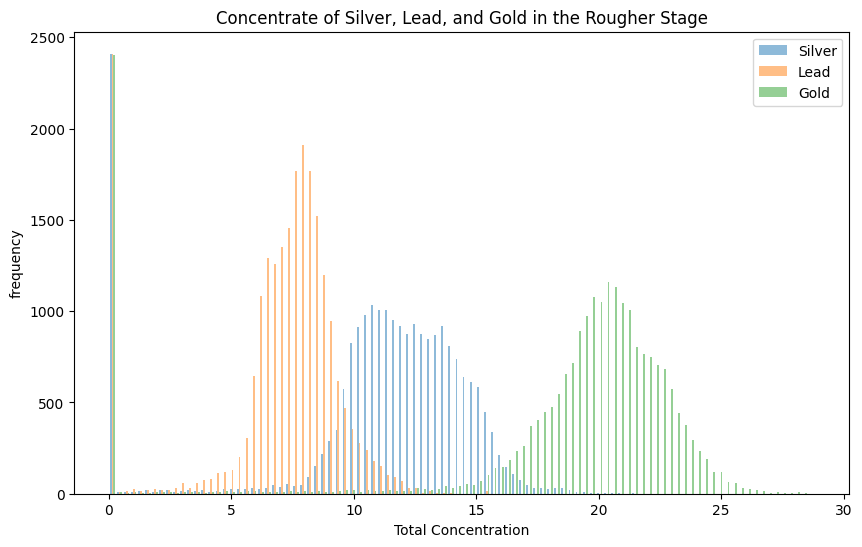

In [ ]:
# make a histogram of the rogher stage
plt.figure(figsize=(10,6))
plt.hist(rougher_stage_concentrate, bins=100, alpha=.5)
plt.title('Concentrate of Silver, Lead, and Gold in the Rougher Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Silver', 'Lead', 'Gold'])
plt.show()

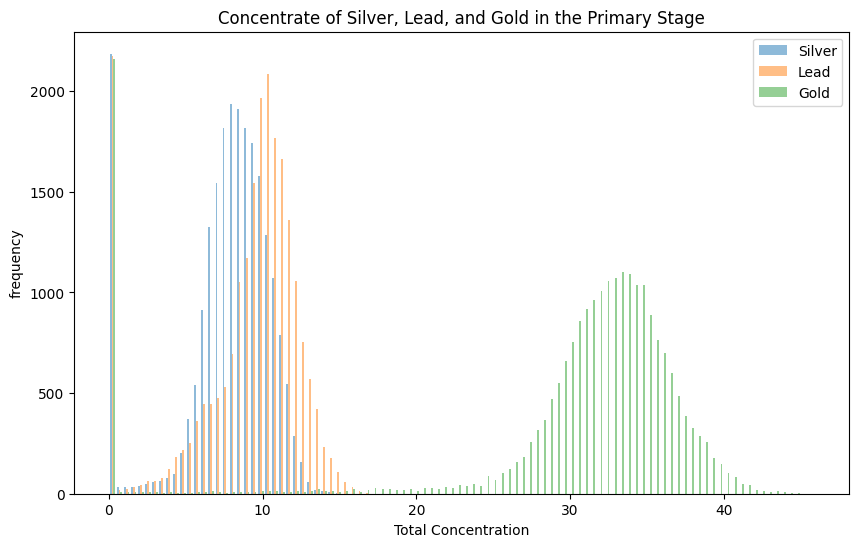

In [ ]:
# Make a histogram of the primary stage
plt.figure(figsize=(10,6))
plt.hist(primary_stage_concentrate, bins=100, alpha=.5)
plt.title('Concentrate of Silver, Lead, and Gold in the Primary Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Silver', 'Lead', 'Gold'])
plt.show()

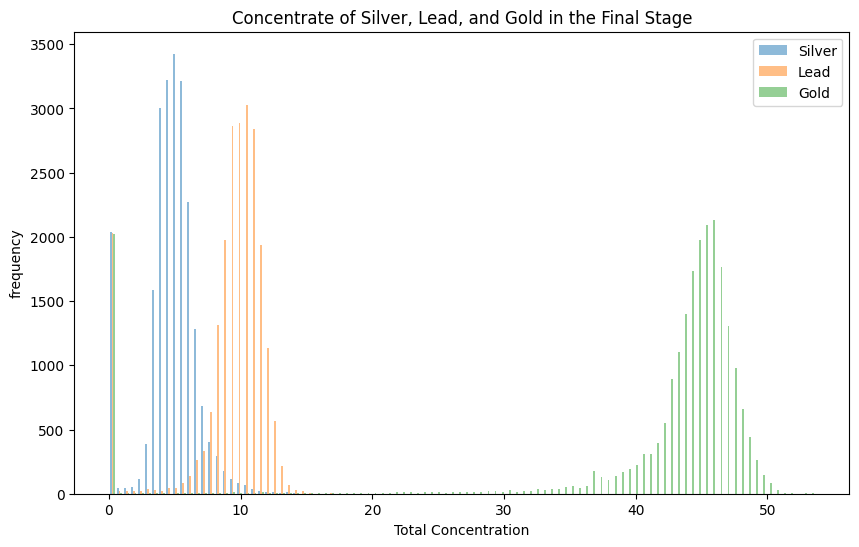

In [ ]:
# Make a histogram of the final stage
plt.figure(figsize=(10,6))
plt.hist(final_stage_concentrate, bins=100, alpha=.5)
plt.title('Concentrate of Silver, Lead, and Gold in the Final Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Silver', 'Lead', 'Gold'])
plt.show()

#### Stage conclusions:
The cleaning process starts with the rougher concentrate, then goes through a primary cleaning where we see the second concentrate level. It finishes after the secondary cleaning resulting with a final concentrate.

In the rougher state, Gold had the highest concentration, then silver and lead. 

After the primary cleaning, Gold remained the highest, and is concentration went up from the rougher state. Silver and Lead were fairly similar to one another. The lead concentration also raised with the primary cleaning like the gold. 

After the seconary cleaning, Gold continued to be the highest and the concentration rose again. Lead climbed slightly, and silver continued to decrease in volume. 

At all three stages there is a large amount of readings near zero with all three metals. These outliers will need to be removed from the data in order to have a functional working model.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [ ]:
# find the mean and median for the input feed size
print(f"the average feed size in the training set is: {df_train['rougher.input.feed_size'].mean():.2f}")
print(f"the average feed size in the test set is: {df_test['rougher.input.feed_size'].mean():.2f}")
print(f"the median feed size in the training set is: {df_train['rougher.input.feed_size'].median():.2f}")
print(f"the median feed size in the test set is: {df_test['rougher.input.feed_size'].median():.2f}")

the average feed size in the training set is: 58.56
the average feed size in the test set is: 55.94
the median feed size in the training set is: 54.10
the median feed size in the test set is: 50.00


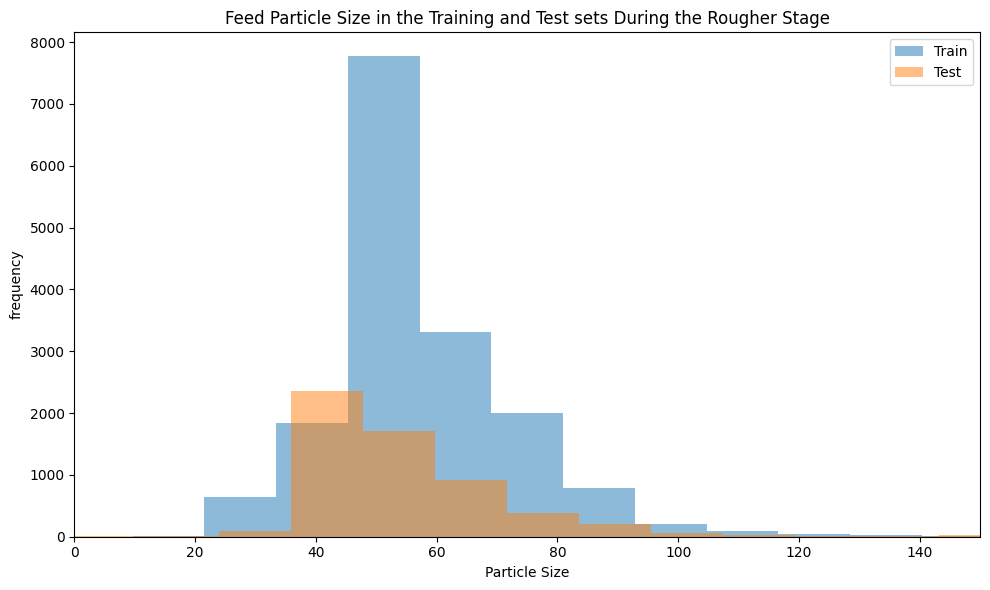

In [ ]:
#Show a comparison of feed size in the the test and train sets
## Rougher stage
plt.figure(figsize=(10,6))
plt.hist(df_train['rougher.input.feed_size'], bins=40, alpha=.5)
plt.hist(df_test['rougher.input.feed_size'], bins=40, alpha=.5)
plt.title('Feed Particle Size in the Training and Test sets During the Rougher Stage')
plt.xlabel('Particle Size')
plt.ylabel('frequency')
plt.legend(['Train', 'Test'])
plt.xlim(0,150)
plt.tight_layout()
plt.show()


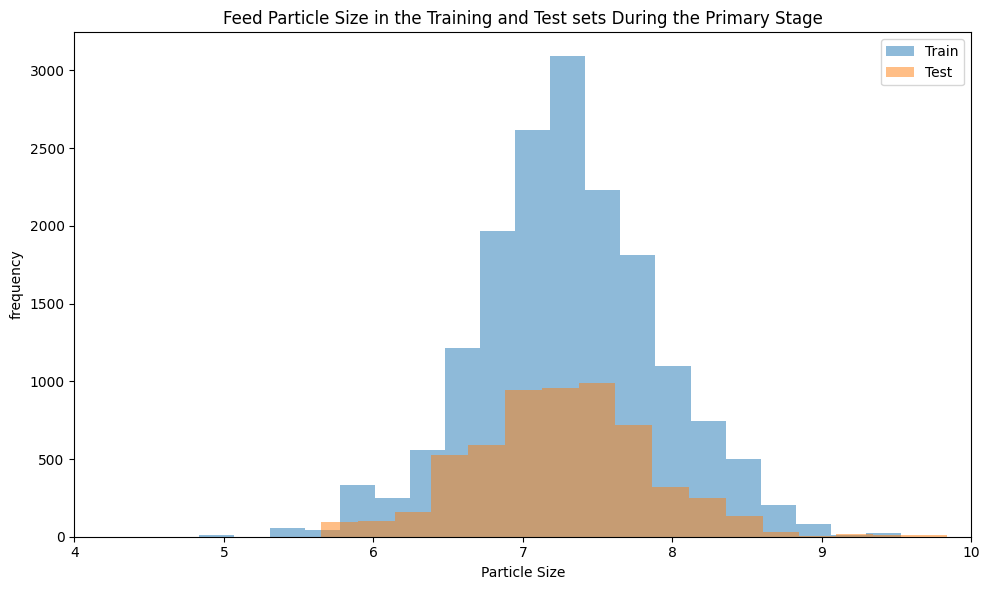

In [ ]:
## Primary cleaning stage
plt.figure(figsize=(10,6))
plt.hist(df_train['primary_cleaner.input.feed_size'], bins=40, alpha=.5)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=40, alpha=.5)
plt.title('Feed Particle Size in the Training and Test sets During the Primary Stage')
plt.xlabel('Particle Size')
plt.ylabel('frequency')
plt.legend(['Train', 'Test'])
plt.xlim(4,10)
plt.tight_layout()
plt.show()

#### Conclusions about the Train and Test Sets:

There isn't a strong difference between the feed size in the test and train sets. Their averages were quite close and the histogram shows that the distribution of the feed size is nearly the same. For this reason, I do not believe that any additional changes need to be made at this point to this data.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

In [ ]:
#make a DataFrame of the metals in each stage
##Gold concentrate per stage
au_stage_concentrate = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
##Silver concentrate per stage
ag_stage_concentrate = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
##Lead concentrate per stage
pb_stage_concentrate = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

In [ ]:
# Make dataframes for each stage with summed metal concentration values for au, ag, and pb
## Raw feed data
raw_feed = (
    df_full['rougher.input.feed_au'] +
    df_full['rougher.input.feed_ag'] +
    df_full['rougher.input.feed_pb']
)

## Rougher Concentrate data
rougher_concentrate = (
    df_full['rougher.output.concentrate_au'] +
    df_full['rougher.output.concentrate_ag'] +
    df_full['rougher.output.concentrate_pb']
)

## Primary Concetrate data
primary_concentrate = (
    df_full['primary_cleaner.output.concentrate_au'] +
    df_full['primary_cleaner.output.concentrate_ag'] +
    df_full['primary_cleaner.output.concentrate_pb']
)

## Final Concentration data
final_output = (
    df_full['final.output.concentrate_au'] +
    df_full['final.output.concentrate_ag'] +
    df_full['final.output.concentrate_pb']
)

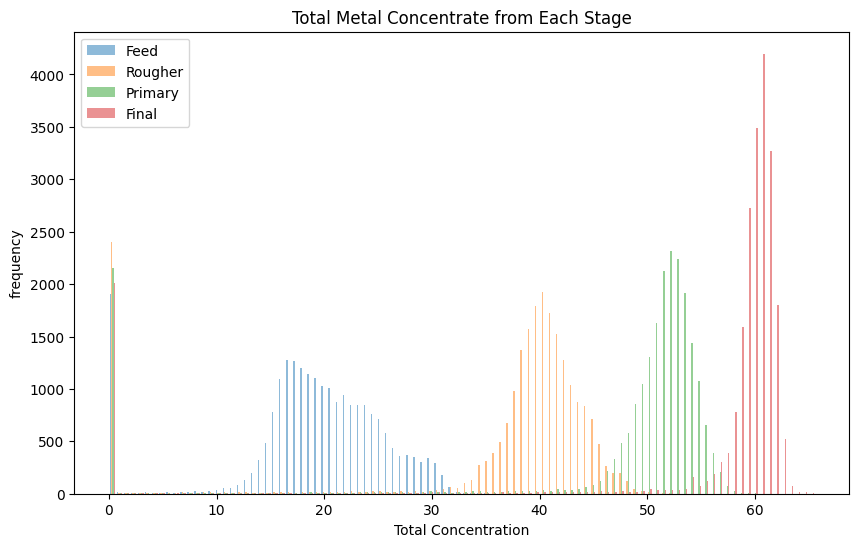

In [ ]:
# Make a histogram plot of the total metal values at each stage
plt.figure(figsize=(10,6))
plt.hist([raw_feed, rougher_concentrate, primary_concentrate, final_output], bins=100, alpha=.5)
plt.title('Total Metal Concentrate from Each Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Feed','Rougher', 'Primary', 'Final'])
plt.show()

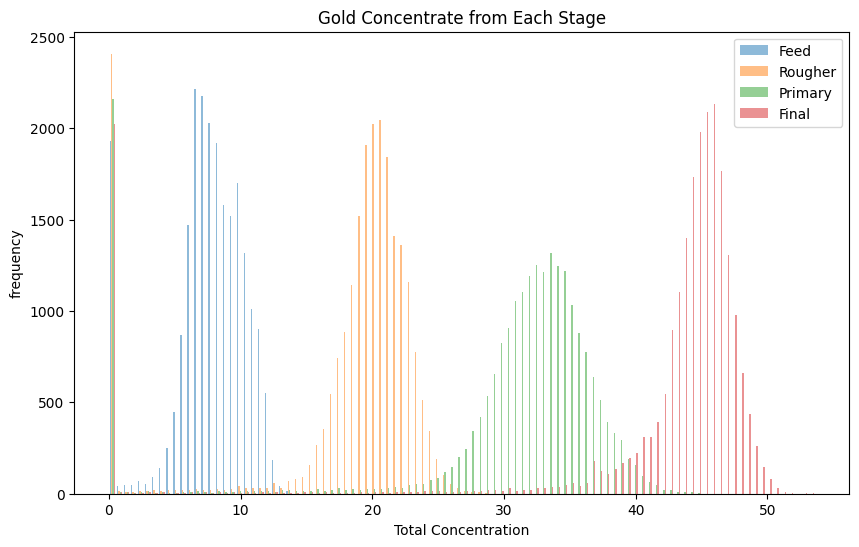

In [ ]:
#Make a Histogram of the Gold concentrate per stage
plt.figure(figsize=(10,6))
plt.hist(au_stage_concentrate, bins=100, alpha=.5)
plt.title('Gold Concentrate from Each Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Feed','Rougher', 'Primary', 'Final'])
plt.show()

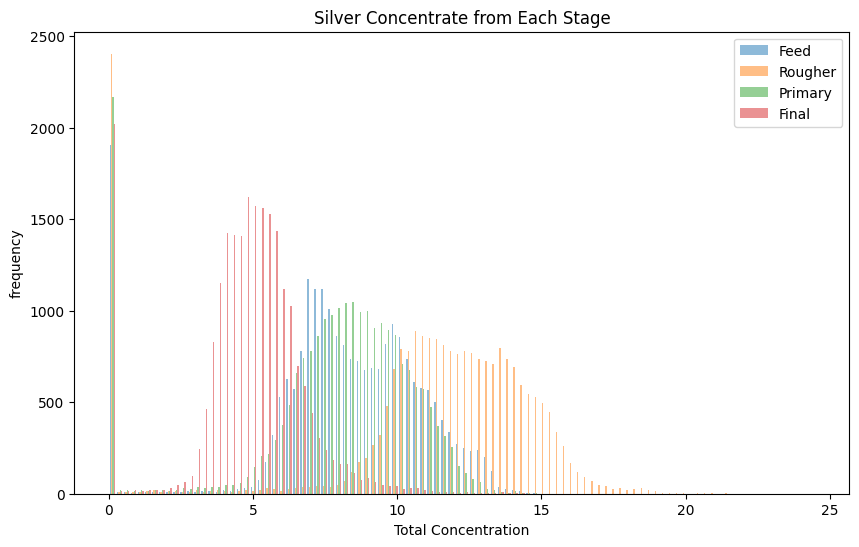

In [ ]:
#Make a Histogram of the Silver concentrate per stage
plt.figure(figsize=(10,6))
plt.hist(ag_stage_concentrate, bins=100, alpha=.5)
plt.title('Silver Concentrate from Each Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Feed', 'Rougher', 'Primary', 'Final'])
plt.show()

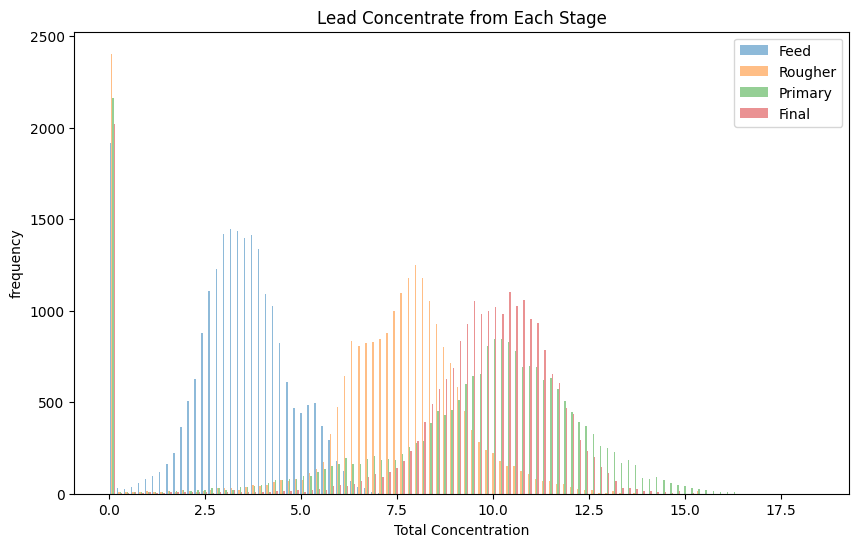

In [ ]:
#Make a Histogram of the lead concentrate per stage
plt.figure(figsize=(10,6))
plt.hist(pb_stage_concentrate, bins=100, alpha=.5)
plt.title('Lead Concentrate from Each Stage')
plt.xlabel('Total Concentration')
plt.ylabel('frequency')
plt.legend(['Feed', 'Rougher', 'Primary', 'Final'])
plt.show()

In [ ]:
# What are the values of the outlier spikes seen above?
display(au_stage_concentrate.value_counts().head(10))

rougher.input.feed_au  rougher.output.concentrate_au  primary_cleaner.output.concentrate_au  final.output.concentrate_au
0.000000               0.000000                       0.000000                               0.000000                       1294
0.010000               0.010000                       0.010000                               0.010000                        334
0.000000               0.000000                       0.000000                               36.900124                        77
7.410750               15.715523                      0.010000                               42.417690                        11
7.556612               13.791368                      0.000000                               37.336849                        10
7.495525               18.652372                      30.350809                              46.105030                         6
8.518138               20.341888                      0.000000                               44.528214   

#### Outlier conclusion:
In order to remove the outlier data, I'm going to remove any rows that have an output concentration near 0 particularly from the rougher stage. This will also remove the most prominent outliers in the other stages as well. While this may remove some data from the final output column where there are positive readings, other stages will be less noisy and more useful for our Machine Learning process.

In [ ]:
# Remove data where the value is less than 0.1 in the Train set in the final.output.concentration columns
# Filter data where all rougher.output.concentrate_* columns are >= 0.1
df_train_filtered = df_train[
    (df_train['rougher.output.concentrate_au'] >= 0.1) &
    (df_train['rougher.output.concentrate_ag'] >= 0.1) &
    (df_train['rougher.output.concentrate_pb'] >= 0.1)
]
print(df_train.shape)
print(df_train_filtered.shape)

(16860, 86)
(14920, 86)


In [ ]:
# Remove data where the value is less than 0.1 in the Test set in the final.output.concentration columns
# Filter data where all rougher.output.concentrate_* columns are >= 0.1
df_test_filtered = full_test[
    (full_test['rougher.output.concentrate_au'] >= 0.1) &
    (full_test['rougher.output.concentrate_ag'] >= 0.1) &
    (full_test['rougher.output.concentrate_pb'] >= 0.1)
]
print(full_test.shape)
print(df_test_filtered.shape)

(5856, 86)
(5396, 86)


In [ ]:
# Remove data where the value is less than 0.1 in the Full set in the final.output.concentration columns
# Filter data where all rougher.output.concentrate_* columns are >= 0.1
df_full_filtered = df_full[
    (df_full['rougher.output.concentrate_au'] >= 0.1) &
    (df_full['rougher.output.concentrate_ag'] >= 0.1) &
    (df_full['rougher.output.concentrate_pb'] >= 0.1)
]
print(df_full.shape)
print(df_full_filtered.shape)

(22716, 86)
(20218, 86)


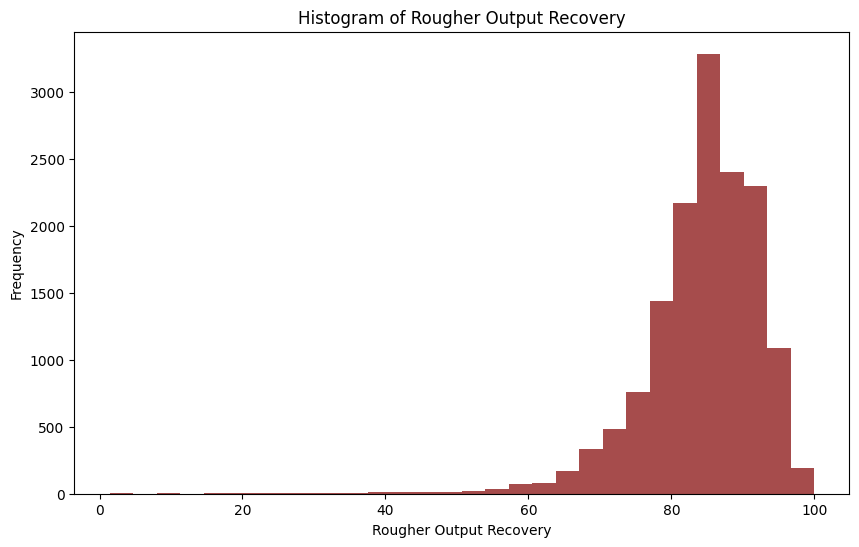

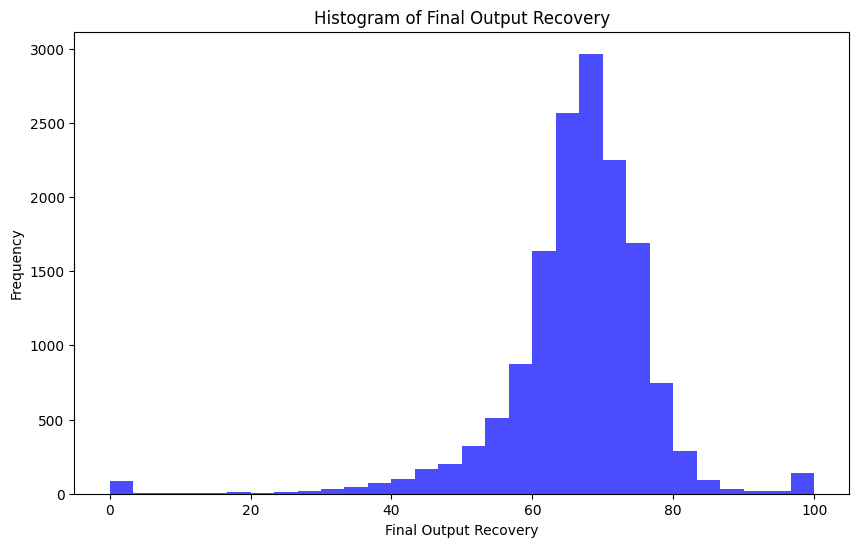

In [ ]:
#Visualize the target columns

## show what the rougher output recovery column values distribution looks like
plt.figure(figsize=(10, 6))
plt.hist(df_train_filtered['rougher.output.recovery'], bins=30, alpha=0.7, color='maroon')
plt.xlabel('Rougher Output Recovery')
plt.ylabel('Frequency')
plt.title('Histogram of Rougher Output Recovery')
plt.show()

## show what the final output recovery column values distribution looks like
plt.figure(figsize=(10, 6))
plt.hist(df_train_filtered['final.output.recovery'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Final Output Recovery')
plt.ylabel('Frequency')
plt.title('Histogram of Final Output Recovery')
plt.show()

## Build the model

### Write a function to calculate the final sMAPE value.

This is the formula I will be working with:

1/N*(SUM(|(Target - Prediction)|/((|Target|+|Prediction|)/2)))*100

In [ ]:
# write a function for sMAPE
def sMAPE (target, prediction):
    denominator = (np.abs(prediction) + np.abs(target)) / 2
    smape = np.mean(np.abs(prediction - target) / denominator) * 100
    return smape

smape_scorer = make_scorer(sMAPE, greater_is_better=False)

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [ ]:
#create features and targets in the training set
## Train Features
features_train = df_train_filtered.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

## Rougher and Final Output Targets train set
target_train_rougher = df_train_filtered['rougher.output.recovery']
target_train_final = df_train_filtered['final.output.recovery']

#create the same features and targets in the testing set
## Test Features
features_test = df_test_filtered.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

## Rougher and Final Output Target test set
target_test_rougher = df_test_filtered['rougher.output.recovery']
target_test_final = df_test_filtered['final.output.recovery']

#create the same featuers and targets in the full set
## Full Features
features_full = df_full_filtered.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

## Rougher and Final Output Target full set
target_full_rougher = df_full_filtered['rougher.output.recovery']
target_full_final = df_full_filtered['final.output.recovery']


In [ ]:
# Scaling numerical features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(features_train)
test_data_scaled = scaler.transform(features_test)
full_data_scaled = scaler.transform(features_full)

# make the scaled data back into a dataframe
train_data_scaled = pd.DataFrame(train_data_scaled, columns=features_train.columns, index=df_train_filtered.index)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=features_test.columns, index=df_test_filtered.index)
full_data_scaled = pd.DataFrame(full_data_scaled, columns=features_full.columns, index=df_full_filtered.index)

In [ ]:
# Build a RandomForest Regrssor model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=8420)

rf_rougher = model_rf.fit(train_data_scaled, target_train_rougher)
rf_final = model_rf.fit(train_data_scaled, target_train_final)

I used this param grid to find the best hyperparameters. I chose to make this a markdown cell because it took more than 3 hours to run. 

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=8420),
                           param_grid, cv=5, scoring=smape_scorer)
grid_search.fit(features_train_rougher, target_train_rougher)
print(f"Best Params: {grid_search.best_params_}")

In [ ]:
# Evaluate models using cross-validation
scores_rougher_rf = cross_val_score(model_rf, train_data_scaled, target_train_rougher, cv=5, scoring=smape_scorer)
scores_final_rf = cross_val_score(model_rf, train_data_scaled, target_train_final, cv=5, scoring=smape_scorer)

print(f"Rougher RF Model sMAPE (CV): Mean = {-scores_rougher_rf.mean():.3f}%, Std = {scores_rougher_rf.std():.3f}")
print(f"Final RF Model sMAPE (CV): Mean = {-scores_final_rf.mean():.3f}%, Std = {scores_final_rf.std():.3f}")

Rougher RF Model sMAPE (CV): Mean = 1.763%, Std = 0.684
Final RF Model sMAPE (CV): Mean = 3.499%, Std = 0.441


#### RandomForest Evaluation:

This model appears to be quite efficient with an average error of only 1.7% in the rougher stage and 3.5% in the final stage.

In [ ]:
# Build the Linear Regression Model
model_lr = LinearRegression()

lr_rougher = model_lr.fit(train_data_scaled, target_train_rougher)
lr_final = model_lr.fit(train_data_scaled, target_train_final)

In [ ]:
# Evaluate models using cross-validation
scores_rougher_lr = cross_val_score(model_lr, train_data_scaled, target_train_rougher, cv=5, scoring=smape_scorer)
scores_final_lr = cross_val_score(model_lr, train_data_scaled, target_train_final, cv=5, scoring=smape_scorer)

print(f"Rougher LR Model sMAPE (CV): Mean = {-scores_rougher_lr.mean():.3f}%, Std = {scores_rougher_lr.std():.3f}")
print(f"Final LR Model sMAPE (CV): Mean = {-scores_final_lr.mean():.3f}%, Std = {scores_final_lr.std():.3f}")

Rougher LR Model sMAPE (CV): Mean = 3.435%, Std = 0.506
Final LR Model sMAPE (CV): Mean = 6.379%, Std = 0.482


#### LinearRegression Evaluation:

This model does not perform quite as well as the Random Forest model, with mean values at 3.4% in the rougher stage and 6.4% in the Final stage. It is not likely that this model will be used in the final testing.

In [ ]:
# Build a DecisionTree Model
model_dt = DecisionTreeRegressor(max_depth=10, random_state=8420)

dt_rougher = model_dt.fit(train_data_scaled, target_train_rougher)
dt_final = model_dt.fit(train_data_scaled, target_train_final)

In [ ]:
# Evaluate models using cross-validation
scores_rougher_dt = cross_val_score(model_dt, train_data_scaled, target_train_rougher, cv=5, scoring=smape_scorer)
scores_final_dt = cross_val_score(model_dt, train_data_scaled, target_train_final, cv=5, scoring=smape_scorer)

print(f"Rougher DT Model sMAPE (CV): Mean = {-scores_rougher_dt.mean():.3f}%, Std = {scores_rougher_dt.std():.3f}")
print(f"Final DT Model sMAPE (CV): Mean = {-scores_final_dt.mean():.3f}%, Std = {scores_final_dt.std():.3f}")

Rougher DT Model sMAPE (CV): Mean = 2.707%, Std = 0.576
Final DT Model sMAPE (CV): Mean = 4.472%, Std = 0.321


#### DecisionTree Evaluation:

This model performed moderately well, but still not as well as the Random Forest model. The Mean values at the rougher stage is 2.7% and at the final stage 4.5%. 

### Test the models with the Test Set

In [ ]:
# calculate the final values for each model using the test set on the Random Forest Model
predictions_rougher_rf = rf_rougher.predict(test_data_scaled)
predictions_final_rf = rf_final.predict(test_data_scaled)

smape_rougher_rf = sMAPE(target_test_rougher, predictions_rougher_rf)
smape_final_rf = sMAPE(target_test_final, predictions_final_rf)

# calculate the final values for each model using the test set on the Linear Regression Model
predictions_rougher_lr = lr_rougher.predict(test_data_scaled)
predictions_final_lr = lr_final.predict(test_data_scaled)

smape_rougher_lr = sMAPE(target_test_rougher, predictions_rougher_lr)
smape_final_lr = sMAPE(target_test_final, predictions_final_lr)

# calculate the final values for each model using the test set on the Decision Tree Model

predictions_rougher_dt = dt_rougher.predict(test_data_scaled)
predictions_final_dt = dt_final.predict(test_data_scaled)

smape_rougher_dt = sMAPE(target_test_rougher, predictions_rougher_dt)
smape_final_dt = sMAPE(target_test_final, predictions_final_dt)

In [ ]:
# Make a Final sMAPE function
def final_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

In [ ]:
final_smape_rf = final_smape(smape_rougher_rf, smape_final_rf)
print(f'Final sMAPE value for the Random Forest Model is: {final_smape_rf:.2f}')

final_smape_rf = final_smape(smape_rougher_dt, smape_final_dt)
print(f'Final sMAPE value for the Decision Tree Model is: {final_smape_rf:.2f}')

final_smape_rf = final_smape(smape_rougher_lr, smape_final_lr)
print(f'Final sMAPE value for the Linear Regression Model is: {final_smape_rf:.2f}')



Final sMAPE value for the Random Forest Model is: 8.91
Final sMAPE value for the Decision Tree Model is: 9.34
Final sMAPE value for the Linear Regression Model is: 10.67


#### Testing results:

As expected the Random Forest model shows the least average error of the three models. It would be best to move forward with just the Random Forest Regression model.

### Sanity Check the Process

In [ ]:
# Sanity Check using mean values as the prediction
avg_rougher_target = target_full_rougher.mean()
avg_final_target = target_full_final.mean()

# Create arrays filled with mean values to match the target array length
avg_rougher_prediction = np.full_like(target_full_rougher, avg_rougher_target)
avg_final_prediction = np.full_like(target_full_final, avg_final_target)

# Calculate sMAPE for sanity check
smape_rougher_sanity = sMAPE(target_full_rougher, avg_rougher_prediction)
smape_final_sanity = sMAPE(target_full_final, avg_final_prediction)

# Weighted final sMAPE
final_smape_sanity = final_smape(smape_rougher_sanity, smape_final_sanity)
print(f'Final sMAPE value for the Sanity Check is: {final_smape_rf:.2f}')

Final sMAPE value for the Sanity Check is: 10.67


#### Sanity Check Evaluation:

I wanted to make sure that using the mean values from the rougher output and final output columns wouldn't provide a better prediction than our Random Forest Model. The 10.67% value is still quite good, even out performing the linear regression model, but the Random Forest Model proves to have a lower error by nearly 1.8%. As a result, this Random Forest model will do better for the Gold Mining Company in predicting gold outputs at the Rogher and Final stages.

### Extract Feature Importance:

Find which features were most important for the Random Forest model so that I can make quality recommendations to Zyfra in their process optimization report.

Top 10 Most Important Features:
                          Feature  Importance
7            final.output.tail_au    0.325985
37          rougher.input.feed_au    0.168868
8   primary_cleaner.input.sulfate    0.077716
32          rougher.input.feed_ag    0.077152
4            final.output.tail_ag    0.045767
3     final.output.concentrate_au    0.038874
1     final.output.concentrate_pb    0.035925
2    final.output.concentrate_sol    0.033502
0     final.output.concentrate_ag    0.025410
5            final.output.tail_pb    0.020205

Top 10 Least Important Features:
                                       Feature  Importance
66    secondary_cleaner.state.floatbank2_a_air    0.000704
21    primary_cleaner.state.floatbank8_a_level    0.000673
61           rougher.state.floatbank10_f_level    0.000666
64           secondary_cleaner.output.tail_sol    0.000659
53           rougher.state.floatbank10_b_level    0.000634
55           rougher.state.floatbank10_c_level    0.000619
79  secondary_c

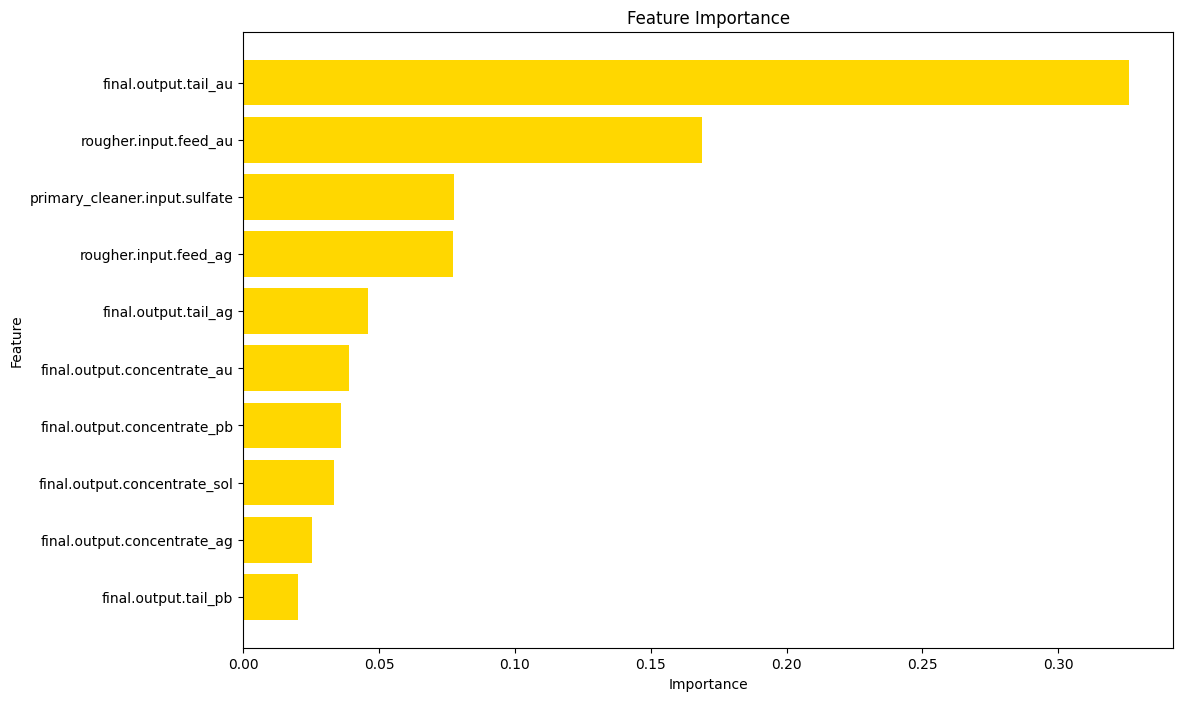

In [ ]:
# Extract feature importances
feature_importances = rf_rougher.feature_importances_

# Pair feature names with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': train_data_scaled.columns,
    'Importance': feature_importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top and bottom features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

print("\nTop 10 Least Important Features:")
print(feature_importance_df.tail(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='gold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()

## **Conclusion**

Task: A gold mining and refining company has asked Zyfra to discover data driven insights into the purification process. The goal was to be able to build a model that predicts the amount of gold recovered from the ore that was mined. The gold ore goes through a multi step cleaning process and the company has readings about each of the cleaning stages. I needed to use a Symetrical Mean Absolute Percentage Error (sMAPE) calculation to show the accuracy of the predictive model. 

Process:The data came in three different files: Training, Test, and Full. The Test set did not include all of the columns that the Training and Full sets did, So I used the Date column as a functional ID for each observation, and then found the corresponding dates from the Full set so that I could extract the missing columns. Once I had a complete data set I was able to clean the data and verify that the information in the calculated columns were correctly done. 

After the data was cleaned, I wrote a function to calculate the sMAPE score for each prediction. Then I used the training data set to build three machine learning regression models: Random Forest, Linear Regression, and Decision Tree. Once the models were built, I preliminarily showed that the sMAPE on the Training set were below 10%. After each model was trained effectively I applied the models to the test set to confirm which model performed most accurately in predicting the Rougher and Final Output Recovery of Gold. 

To make sure that the best model outperformed random chance, I also wrote a sanity check that made the prediction value equal to the mean for the whole column. This was able to prove that both the Random Forest Regressor and the Decision Tree Regressor were more effective at predicting the quantity of gold recovered. 

As one final step, I also looked deeper into the Random Forest model to find which features were the most important for predicting accurately the target values. 

Conclusions & Recommendations: The Random Forest model performed better than the other two models with an final sMAPE value of 8.9% whereas the sanity check provided a sMAPE of 10.2%. This 1.3% improvement shows that it would be best to use the Random Forest model for future predictions. However, this model is cumbersome and time consuming. If a more time efficient model is required, the Decision Tree model was also able to outperform the sanity check by nearly 1% coming in at 9.3%. The Decision Tree model would be a better predictive choice is the business is needing to make quicker predictions. 

Finally, the most important features for building these more effective models were the final.output.tail_au and the rougher.input.feed_au. This suggests that early and late readings of gold within the ore and solution provide the best indicator of the quality of the ore itself. If the company would like to work on improving processes then finding optimized solutions at these two points would be of highest benefit.
